In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Hungary'

link = 'https://rally-base.com/2023/rally-hungary-2023/?ssId='
startat, no_ss=7889, int(12) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Marczyk M,RC2,00:01:36.9,89.16 0.00,00:00:00.0 00:00:00.0,1,Hungary,1
2,2,3,Sesks M.,RC2,00:01:37.4,88.71 0.21,00:00:00.5 00:00:00.5,1,Hungary,2
3,3,10,Cais Erik,RC2,00:01:37.9,88.25 0.42,00:00:01.0 00:00:00.5,1,Hungary,3
4,4,1,Østberg M,RC2,00:01:38.3,87.89 0.58,00:00:01.4 00:00:00.4,1,Hungary,4
5,4,2,Llarena E,RC2,00:01:38.3,87.89 0.58,00:00:01.4 00:00:00.0,1,Hungary,5
...,...,...,...,...,...,...,...,...,...,...
27,27,37,Sugar Cri,RC4,00:07:45.5,97.68 4.20,00:00:53.0 00:00:01.3,12,Hungary,27
28,28,26,McRae Max,RC4,00:07:52.4,96.25 4.74,00:00:59.9 00:00:06.9,12,Hungary,28
29,29,35,Berta Lás,RC4,00:07:53.1,96.11 4.80,00:01:00.6 00:00:00.7,12,Hungary,29
30,30,36,Viszlo Cs,RC4,00:08:02.7,94.20 5.56,00:01:10.2 00:00:09.6,12,Hungary,30


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                            Pos.                                            
ss                             1   2   3   4   5   6   7   8   9   10  11  12
No. Crew       Group Race                                                    
1   Østberg  M RC2   Hungary    4   3   2   5   5   2   1   2   2   8   1   1
2   Llarena  E RC2   Hungary    4   6  33  12  13  14  11  11  12   3   7   5
3   Sesks  M.  RC2   Hungary    2   8   7   9   8   7   6  10   7   1   5   8
4   Franceschi RC2   Hungary   12  17  10  11  11  11  27   9  13   9  14   6
5   Bonato  Yo RC2   Hungary    9   7   6   3   2   6  12   5  10   5   6   9
6   Mareš  Fil RC2   Hungary    7  13  31  12   3  10  26  13   9   2   9   2
7   Csomós  Mi RC2   Hungary   11   1   1   1   3   1   2   1   1  10   -   -
8   Marczyk  M RC2   Hungary    1   4   5   4   7   4   5  31   4   5   4   3
9   McErlean   RC2   Hungary   35   -   -   -   -   -   -   -   -   -   -   -
10  Cais  Erik RC2   Hungary    3   5   4   6   1   5   3   4   5  30   3  18
11  László  Ma RC2   Hungary   12  16  11  17   9  16  10  16  17  13  15  14
12  Cuzma  Bog RC2   Hungary   18  28  23  21  21  28  18  21  24  16  21  16
14  Vincze  Fe RC2   Hungary    8   2   3   2   6   3   3   2   3   4   2   4
15  Turán  Fri RC2   Hungary    6   9   9   8  10   8   8   8   6   7  12  10
16  Hadik  And RC2   Hungary    9  10   8   7  14  12   7   6   8  32   8  11
17  Bodolai  L RC2   Hungary   17  14  14  14  18  17  33  31  18  33  23  17
18  Trencsényi RC2   Hungary   36  35  15  15  15  21  13  14  16  15  16  15
19  Allen  Phi RC2   Hungary   16  15  35  18  12  15  31  15  15  12  13   7
20  Michelisz  RC2   Hungary   14  12  13  16  16   9  29  12  14  11  11  12
32  Német  Gáb RC2   Hungary   15  11  12  10  17  13   9   7  11  14  10  13

In [8]:
rally2023_ClassView

0                            Pos.                                            
ss                             1   2   3   4   5   6   7   8   9   10  11  12
No. Crew       Group Race                                                    
1   Østberg  M RC2   Hungary    4   3   2   5   5   2   1   2   2   8   1   1
2   Llarena  E RC2   Hungary    4   6  33  12  13  14  11  11  12   3   7   5
3   Sesks  M.  RC2   Hungary    2   8   7   9   8   7   6  10   7   1   5   8
4   Franceschi RC2   Hungary   12  17  10  11  11  11  27   9  13   9  14   6
5   Bonato  Yo RC2   Hungary    9   7   6   3   2   6  12   5  10   5   6   9
6   Mareš  Fil RC2   Hungary    7  13  31  12   3  10  26  13   9   2   9   2
7   Csomós  Mi RC2   Hungary   11   1   1   1   3   1   2   1   1  10   -   -
8   Marczyk  M RC2   Hungary    1   4   5   4   7   4   5  31   4   5   4   3
9   McErlean   RC2   Hungary   35   -   -   -   -   -   -   -   -   -   -   -
10  Cais  Erik RC2   Hungary    3   5   4   6   1   5   3   4   5  30   3  18
11  László  Ma RC2   Hungary   12  16  11  17   9  16  10  16  17  13  15  14
12  Cuzma  Bog RC2   Hungary   18  28  23  21  21  28  18  21  24  16  21  16
14  Vincze  Fe RC2   Hungary    8   2   3   2   6   3   3   2   3   4   2   4
15  Turán  Fri RC2   Hungary    6   9   9   8  10   8   8   8   6   7  12  10
16  Hadik  And RC2   Hungary    9  10   8   7  14  12   7   6   8  32   8  11
17  Bodolai  L RC2   Hungary   17  14  14  14  18  17  33  31  18  33  23  17
18  Trencsényi RC2   Hungary   36  35  15  15  15  21  13  14  16  15  16  15
19  Allen  Phi RC2   Hungary   16  15  35  18  12  15  31  15  15  12  13   7
20  Michelisz  RC2   Hungary   14  12  13  16  16   9  29  12  14  11  11  12
21  Maior  Nor RC4   Hungary   23  19  19  20  19  18  17  18  19  17  19  26
22  Daprà  Rob RC4   Hungary   18  20  20  19  22  22  16  17  20  19  18  23
23  Nore  Ola  RC4   Hungary   29  34  17  23  28  23  15  23  22  18  25  20
24  Schulz  Ti RC4   Hungary   20  22  18  24  27  19  32  30  21  22  17  19
25  Zanin  Mat RC4   Hungary   28  26  25  26  24  24  24  33  27  25  30  21
26  McRae  Max RC4   Hungary   27  24  21  22  35  35  34  33  28  26  21  28
27  Johansson  RC4   Hungary   25  23  22  25  23  26  30  20  25  20  20  22
28  Škulj  Mar RC4   Hungary   26  27  26  29  20  29  19  22  26  24  24  24
29  Herczig  P RC4   Hungary   21  25  27  30  25  27  20  25  29  23  26  25
30  Kreuter  N RC4   Hungary   34  33  29  33  32  33  25  28  34   -   -   -
31  Hangodi  B RC4   Hungary   22  21  24  28  29  25  21  19  22  21   -   -
32  Német  Gáb RC2   Hungary   15  11  12  10  17  13   9   7  11  14  10  13
33  Kohn  Fili RC3   Hungary   24  18  16  27  26  20  14  24   -   -   -   -
34  Rada  Mart RGT   Hungary   32  32  32  35  34  34  28  29  33  31  31  31
35  Berta  Lás RC4   Hungary   31  30  34  34  33  30  22  26  31  28  29  29
36  Viszlo  Cs RC4   Hungary   32  31  28  31  30  31  23  27  30  29  28  30
37  Sugar  Cri RC4   Hungary   30  29  30  32  30  32  34  33  32  27  27  27

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Marczyk M,RC2,1,Hungary,1,96.9
2,3,Sesks M.,RC2,1,Hungary,2,97.4
3,10,Cais Erik,RC2,1,Hungary,3,97.9
4,1,Østberg M,RC2,1,Hungary,4,98.3
5,2,Llarena E,RC2,1,Hungary,5,98.3
...,...,...,...,...,...,...,...
27,37,Sugar Cri,RC4,12,Hungary,27,465.5
28,26,McRae Max,RC4,12,Hungary,28,472.4
29,35,Berta Lás,RC4,12,Hungary,29,473.1
30,36,Viszlo Cs,RC4,12,Hungary,30,482.7


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Hungary 1       96.9
        2      633.4
        3      772.1
        4      292.5
        5      463.1
        6      632.6
        7      768.2
        8      291.2
        9      307.1
        10     840.3
        11     308.3
        12     412.5

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,8,Marczyk M,RC2,1,Hungary,1,96.9,96.9
1,3,Sesks M.,RC2,1,Hungary,2,97.4,96.9
2,10,Cais Erik,RC2,1,Hungary,3,97.9,96.9
3,1,Østberg M,RC2,1,Hungary,4,98.3,96.9
4,2,Llarena E,RC2,1,Hungary,5,98.3,96.9
...,...,...,...,...,...,...,...,...
405,37,Sugar Cri,RC4,12,Hungary,27,465.5,412.5
406,26,McRae Max,RC4,12,Hungary,28,472.4,412.5
407,35,Berta Lás,RC4,12,Hungary,29,473.1,412.5
408,36,Viszlo Cs,RC4,12,Hungary,30,482.7,412.5


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Marczyk M,RC2,1,Hungary,1,96.9,96.9,0.0,0.000000,01
1,3,Sesks M.,RC2,1,Hungary,2,97.4,96.9,0.5,0.515996,01
2,10,Cais Erik,RC2,1,Hungary,3,97.9,96.9,1.0,1.031992,01
3,1,Østberg M,RC2,1,Hungary,4,98.3,96.9,1.4,1.444788,01
4,2,Llarena E,RC2,1,Hungary,5,98.3,96.9,1.4,1.444788,01
...,...,...,...,...,...,...,...,...,...,...,...
405,37,Sugar Cri,RC4,12,Hungary,27,465.5,412.5,53.0,12.848485,12
406,26,McRae Max,RC4,12,Hungary,28,472.4,412.5,59.9,14.521212,12
407,35,Berta Lás,RC4,12,Hungary,29,473.1,412.5,60.6,14.690909,12
408,36,Viszlo Cs,RC4,12,Hungary,30,482.7,412.5,70.2,17.018182,12


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Marczyk M,RC2,1,Hungary,1,96.9,96.9,0.0,0.000000,01
1,3,Sesks M.,RC2,1,Hungary,2,97.4,96.9,0.5,0.515996,01
2,10,Cais Erik,RC2,1,Hungary,3,97.9,96.9,1.0,1.031992,01
3,1,Østberg M,RC2,1,Hungary,4,98.3,96.9,1.4,1.444788,01
4,2,Llarena E,RC2,1,Hungary,5,98.3,96.9,1.4,1.444788,01
...,...,...,...,...,...,...,...,...,...,...,...
392,11,László Ma,RC2,12,Hungary,14,431.9,412.5,19.4,4.703030,12
393,18,Trencsényi,RC2,12,Hungary,15,434.6,412.5,22.1,5.357576,12
394,12,Cuzma Bog,RC2,12,Hungary,16,438.5,412.5,26.0,6.303030,12
395,17,Bodolai L,RC2,12,Hungary,17,442.3,412.5,29.8,7.224242,12


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Marczyk M,RC2,1,Hungary,1,96.9,96.9,0.0,0.000000,01
1,3,Sesks M.,RC2,1,Hungary,2,97.4,96.9,0.5,0.515996,01
2,10,Cais Erik,RC2,1,Hungary,3,97.9,96.9,1.0,1.031992,01
3,1,Østberg M,RC2,1,Hungary,4,98.3,96.9,1.4,1.444788,01
4,2,Llarena E,RC2,1,Hungary,5,98.3,96.9,1.4,1.444788,01
...,...,...,...,...,...,...,...,...,...,...,...
392,11,László Ma,RC2,12,Hungary,14,431.9,412.5,19.4,4.703030,12
393,18,Trencsényi,RC2,12,Hungary,15,434.6,412.5,22.1,5.357576,12
394,12,Cuzma Bog,RC2,12,Hungary,16,438.5,412.5,26.0,6.303030,12
395,17,Bodolai L,RC2,12,Hungary,17,442.3,412.5,29.8,7.224242,12


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Hungary                                                             \
SS.             01     02     03    04    05    06     07     08    09     10   
Crew                                                                            
Allen  Phi     5.1   52.5  270.1  22.8  13.1  43.7  259.0   20.9  14.5   27.6   
Bodolai  L     5.2   46.7   55.2  16.3  34.1  54.2  600.0  600.0  26.2  400.1   
Bonato  Yo     2.3   18.2   12.2   4.3   0.4  13.3   57.3    7.1   9.3    8.8   
Cais  Erik     1.0   14.5    8.4   5.9   0.0  11.4    7.8    5.7   4.9  135.7   
Csomós  Mi     2.4    0.0    0.0   0.0   2.9   0.0    0.3    0.0   0.0   21.3   
Cuzma  Bog     8.3   83.4   88.2  26.4  36.2  81.3   77.1   37.3  31.7   53.7   
Franceschi     2.7   53.8   29.4  14.0  10.6  27.4  178.7   13.4  12.8   15.8   
Hadik  And     2.3   26.9   24.5   7.7  16.2  29.4   22.2    8.0   8.0  243.3   
Llarena  E     1.4   17.8  210.5  14.5  13.2  36.2   43.7   15.0  10.6    7.5   
László  Ma     2.7   52.9   41.3  17.6   9.2  44.9   38.3   22.8  21.2   34.2   
Marczyk  M     0.0   13.6   10.0   4.7   5.2  11.3   10.8  600.0   4.3    8.8   
Mareš  Fil     1.6   35.9  155.0  14.5   2.9  25.0  143.3   15.9   9.2    0.8   
McErlean      46.2    NaN    NaN   NaN   NaN   NaN    NaN    NaN   NaN    NaN   
Michelisz      4.1   31.7   44.7  17.1  21.8  22.5  246.2   15.8  14.1   24.7   
Német  Gáb     4.3   27.0   43.7  10.9  25.7  31.8   26.8    9.8  10.0   35.4   
Sesks  M.      0.5   22.2   21.9  10.2   5.9  19.7   14.3   13.5   7.2    0.0   
Trencsényi    68.3  288.8   65.4  16.6  17.0  60.1   60.0   20.1  18.4   36.2   
Turán  Fri     1.5   25.3   26.0   8.0  10.0  22.3   24.0   10.4   6.3   11.9   
Vincze  Fe     1.7    6.9    4.6   2.4   4.2   6.1    7.8    4.7   2.6    8.6   
Østberg  M     1.4    7.2    2.8   5.7   3.1   3.3    0.0    4.7   0.9   12.9   

Race                    
SS.           11    12  
Crew                    
Allen  Phi  11.8   8.4  
Bodolai  L  33.3  29.8  
Bonato  Yo   4.7  10.1  
Cais  Erik   2.3  31.2  
Csomós  Mi   NaN   NaN  
Cuzma  Bog  31.2  26.0  
Franceschi  15.6   6.8  
Hadik  And   8.1  13.1  
Llarena  E   6.3   5.5  
László  Ma  22.0  19.4  
Marczyk  M   3.3   2.6  
Mareš  Fil   8.2   1.1  
McErlean     NaN   NaN  
Michelisz   10.9  13.3  
Német  Gáb   8.9  17.8  
Sesks  M.    4.0   8.8  
Trencsényi  22.8  22.1  
Turán  Fri  11.3  11.1  
Vincze  Fe   1.3   3.9  
Østberg  M   0.0   0.0

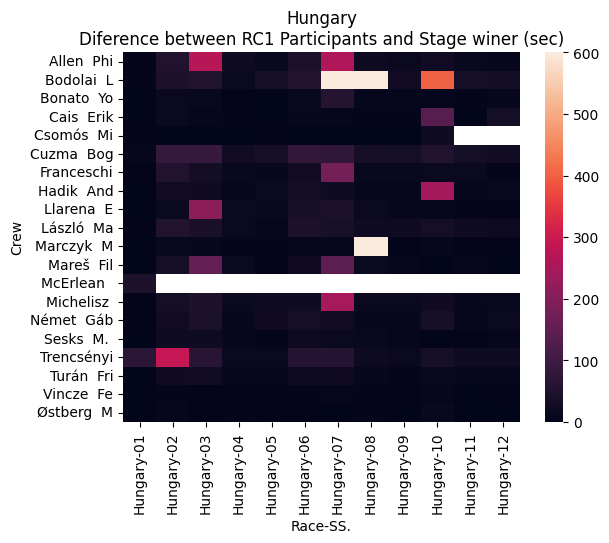

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

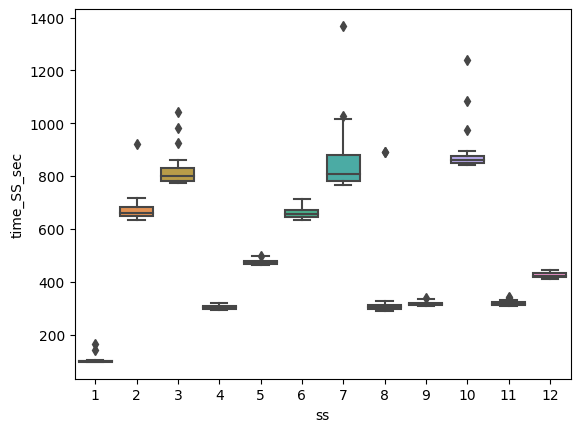

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

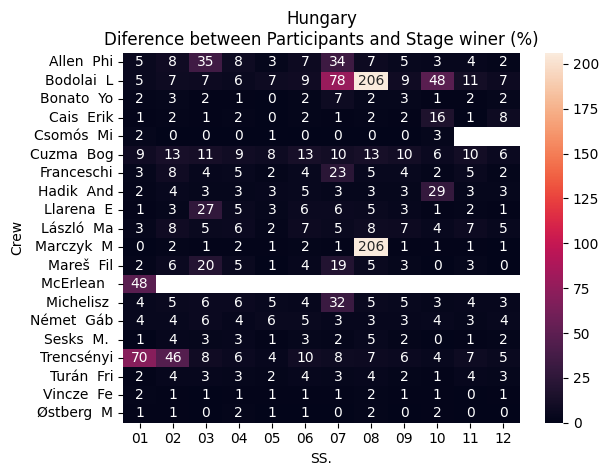

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")